In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# 1. Read the dataset to the python environment

In [4]:
df=pd.read_excel("iris.xls")

In [5]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.shape

(150, 5)

In [9]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [16]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [18]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# 2. Do necessary pre-processing steps.


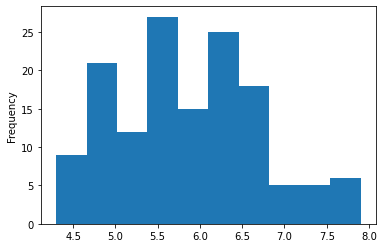

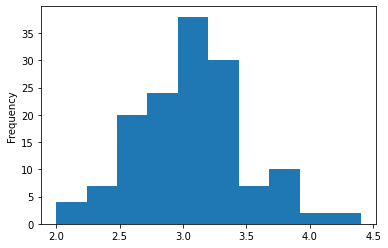

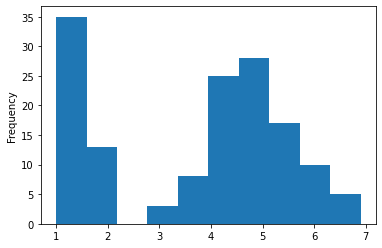

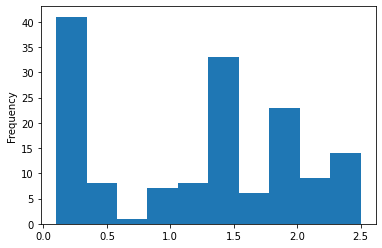

In [24]:
for column in df.columns[:-1]:
    df[column].plot.hist()
    plt.show()

In [29]:
df['SL'] = df['SL'].fillna(df['SL'].median())
df['SW'] = df['SW'].fillna(df['SW'].median())
df['PL'] = df['PL'].fillna(df['PL'].median())

In [30]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'SL, SW, PL, PW')

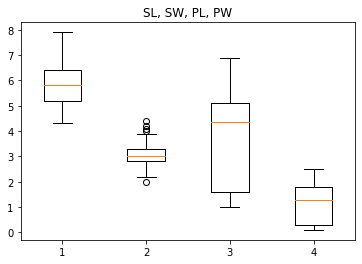

In [31]:
plt.boxplot(df[['SL','SW','PL','PW']])
plt.title('SL, SW, PL, PW')

In [33]:
Q1 = np.percentile(df["SW"] , 25 , interpolation ="midpoint")
Q2 = np.percentile(df["SW"] , 50 , interpolation ="midpoint")
Q3 = np.percentile(df["SW"] , 75 , interpolation ="midpoint")

IQR = Q3 -Q1
print("IQR is :" , IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("lower_limit:" , lower_limit)
print("upper_limit :" , upper_limit)

IQR is : 0.4500000000000002
lower_limit: 2.1249999999999996
upper_limit : 3.9250000000000003


In [34]:
outlier = []
for x in df["SW"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)

print("outliers:" , outlier)

outliers: [4.0, 4.4, 4.1, 4.2, 2.0]


In [35]:
ind1 = df['SW'] > upper_limit
ind2 = df['SW'] < lower_limit
df.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [36]:
y = df['Classification']
X = df.drop(['Classification'],axis=1)

In [37]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [38]:
from sklearn.model_selection import train_test_split
# Creating instance
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=65, test_size = 0.2)

In [40]:
X_train.shape


(120, 4)

In [41]:
X_test.shape

(30, 4)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

LOGISTIC REGRESSION

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , random_state = 42 , test_size =0.2)

from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [78]:
from sklearn.metrics import confusion_matrix ,accuracy_score , precision_score , f1_score

In [79]:
y_pred = logit_model.predict(X_test)

In [89]:
print("accuracy :" , accuracy_score(y_test , y_pred))
print("f1 score :" ,f1_score(y_test ,y_predict ,average="weighted"))
print("precision score : " , precision_score(y_test,y_predict , average="weighted"))

accuracy : 0.9666666666666667
f1 score : 1.0
precision score :  1.0


k-Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier
# Find the optimum k value, for this we have to create a model with varied k values.
# For that first creating an empty list
acc_values = []
# taking values from 3 to 15 to a variable
neighbors = np.arange(1,15)
# Create a loop to create knn models for each k value
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train, y_train)
    y_prediction = classifier.predict(X_test)
    acc= accuracy_score(y_test, y_prediction)
    acc_values.append(acc)
acc_values

[1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

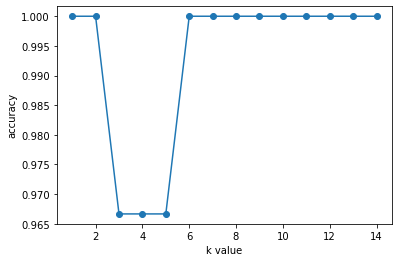

In [82]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [83]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

In [88]:
print("Accuracy is", accuracy_score(y_test,y_prediction))
print("f1 score :" ,f1_score(y_test ,y_predict ,average="weighted"))
print("precision score : " , precision_score(y_test,y_predict , average="weighted"))

Accuracy is 1.0
f1 score : 1.0
precision score :  1.0


SVM model

In [87]:
from sklearn.svm import SVC
svm_linear = SVC(kernel ="linear")
svm_linear.fit(X_train,y_train)
y_predict = svm_linear.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_predict))
print("f1 score :" ,f1_score(y_test ,y_predict ,average="weighted"))
print("precision score : " , precision_score(y_test,y_predict , average="weighted"))


accuracy : 1.0
f1 score : 1.0
precision score :  1.0


Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)
y_pred_dt = dt_model.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_pred_dt))
print("f1 score :" ,f1_score(y_test ,y_pred_dt ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred_dt , average="weighted"))

accuracy : 1.0
f1 score : 1.0
precision score :  1.0


Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_pred_rf))
print("f1 score :" ,f1_score(y_test ,y_pred_rf ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred_rf , average="weighted"))

accuracy : 1.0
f1 score : 1.0
precision score :  1.0


Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_pred_gb))
print("f1 score :" ,f1_score(y_test ,y_pred_gb ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred_gb , average="weighted"))

accuracy : 1.0
f1 score : 1.0
precision score :  1.0


 AS for my findings the Best performing models are Decision Tree,Random Forest,svm,knn,Gradient Boosting